# AMES Project

## Problem Statement: 
According to Dave Ramsey, America's trusted voice on money, house flipping is when a real estate investor buys houses and then sells them for a profit. However, in order for a house to be considered a flip, it must be bought with the intention of quickly reselling. The time between the purchase and the sale often ranges from a couple months up to a year. For individuals interested in flipping a house in Ames, Iowa, what features deserve the most attention? Flipping a house entails buying a house and within a short amount of time renovating the house and selling it back for a profit. Among the features that are within the control of an individual looking to flip the recently purchased house, I suggest that the individual invest their limited time and resources in the kitchen, basement and the exterior quality in that order as when each category is deemed excellent, sale price of a house increases by 5,200, 4600, and 4200, respectively. By improving the three separate features, one can expect that the overall quality of the house to increase, thereby helping the sale price to increase when selling the house back for a profit. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile, SelectFromModel, f_regression, RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import r2_score
import numpy as np
import pickle
import csv

np.random.seed(42) #everytime a random number is generated, it will advance the seed by one every time...

In [2]:
!ls

01_EDA_FeatureEngineering.ipynb 03_Modeling.ipynb
02_Preprocessing.ipynb          04_Kaggle_submission.ipynb


## Train dataset

In [3]:
!cd

In [4]:
!pwd

/Users/mintaekhong/dsi/projects/project-2/Mike_Hong_LA6/code


In [5]:
train = pd.read_csv('../datasets/train.csv', index_col = 'Id')

In [6]:
train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
train.describe().T;

In [8]:
##original train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

## Rename Columns

In [9]:
train.columns = [col.lower().replace(' ', '_') for col in train.columns]

In [10]:
train.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [11]:
train_num_columns = [col for col in train.columns if train[col].dtype != 'object']

In [12]:
train_cat_columns = [col for col in train.columns if train[col].dtype == 'object']

In [13]:
train.shape

(2051, 80)

In [14]:
train.isnull().sum();

### Distribution of target variable 

/Users/mintaekhong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


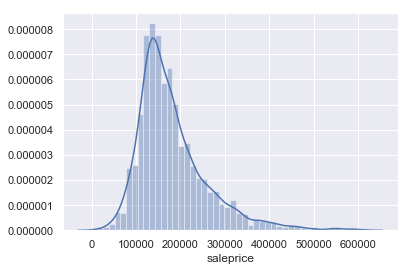

In [15]:
sns.distplot(train['saleprice'])

Sale price of homes in Ames seem to be slightly right skewed. Many houses are centered around 180,000 USD, and very few homes seem to be above 500,000 USD. 

(0.0, 37.0)

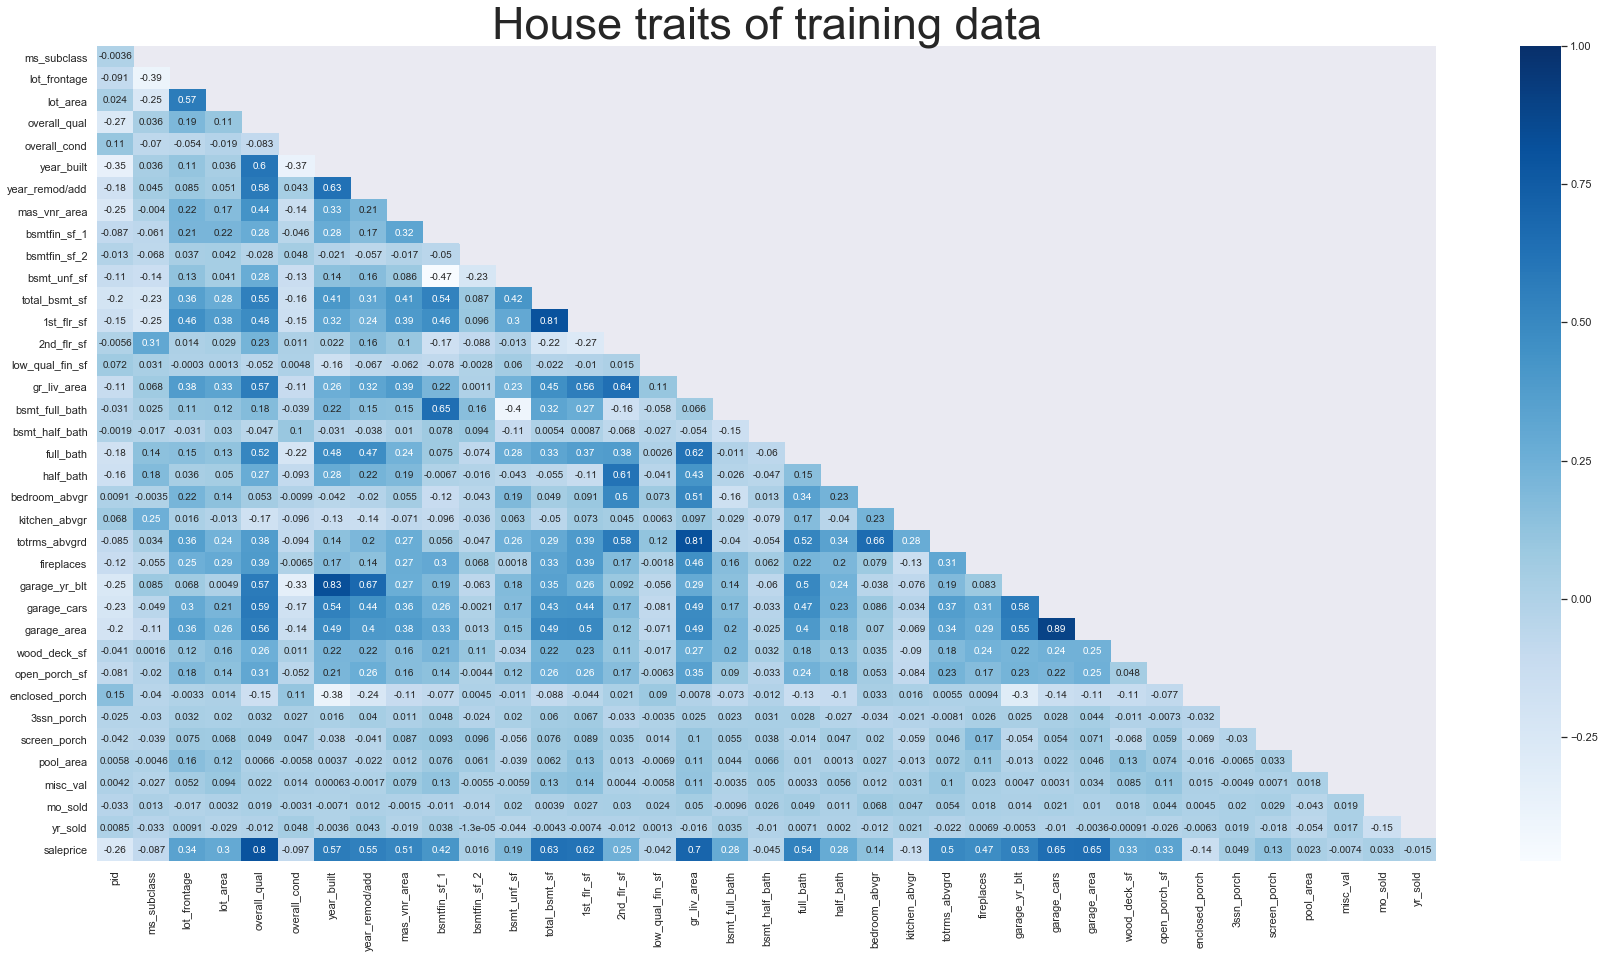

In [16]:
fig = plt.figure(figsize = (30,15))
mask = np.triu(np.ones_like(train.corr()))
ax = sns.heatmap(
    train.corr(), annot = True,
    mask = mask,
    cmap = 'Blues')
ax.set_title('House traits of training data', fontsize = 45)
y_min, y_max = ax.get_ylim() ##getting rid of the variable with corr 1
x_min, x_max = ax.get_xlim()
ax.set_ylim(top=y_max+1)
ax.set_xlim(right=x_max-1)

A heatmap of all numerical features including our target variable, salesprice. Features that are highly correlated with each other such as those related to garages and 1st and 2nd floor square feet should be investigated further.

Text(0.5, 1.0, 'Correlation of saleprice and features')

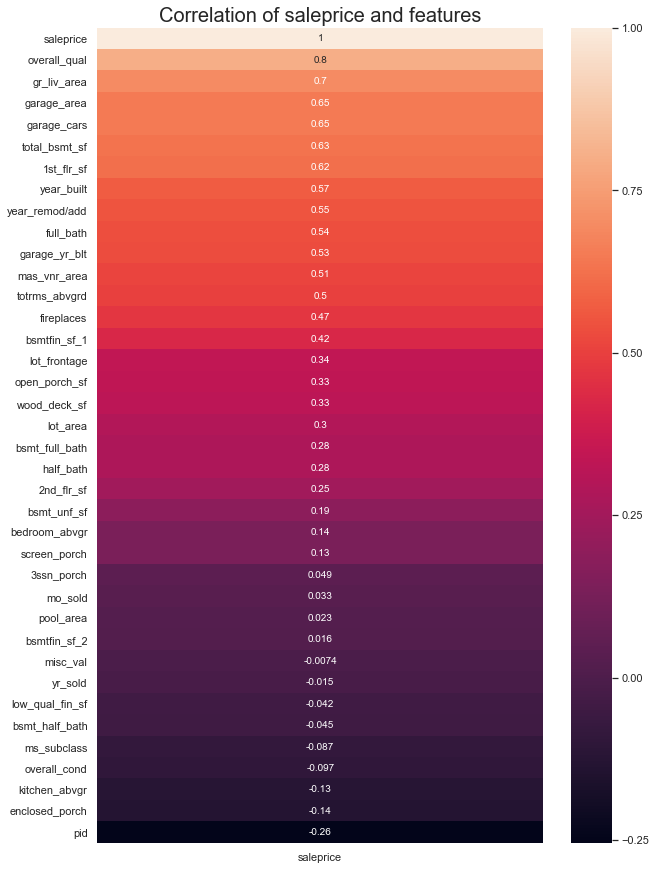

In [17]:
plt.figure(figsize = (10,15))
ax = sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice', ascending = False), annot = True)
ax.set_title('Correlation of saleprice and features', fontsize = 20)

Initial inspection leads me to believe that features such as misc_val, yr_sold, low_qual_fin_sf, and bsmt_half_bath will not have much of an impact in the linear regression due to its small correlation coefficient with the target variable (saleprice). On the other hand, variables such as gr_liv_area and garage_area may have strong influence on the model.

# EDA/Data Cleaning/Feature Engineering

In [18]:
##Change overall_qual, overall_cond into objects
train['overall_qual'] = train['overall_qual'].astype(object)
train['overall_cond'] = train['overall_cond'].astype(object)

In [19]:
train['garage_cars'].isnull().sum()

1

In [20]:
train[train['garage_cars'].isnull()]['garage_yr_blt']

Id
2237   NaN
Name: garage_yr_blt, dtype: float64

In [21]:
##remove row 2237 because it has multiple columns with null observation
train.drop(2237, axis = 0, inplace=True)

In [22]:
train.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 80 columns):
pid                2050 non-null int64
ms_subclass        2050 non-null int64
ms_zoning          2050 non-null object
lot_frontage       1720 non-null float64
lot_area           2050 non-null int64
street             2050 non-null object
alley              140 non-null object
lot_shape          2050 non-null object
land_contour       2050 non-null object
utilities          2050 non-null object
lot_config         2050 non-null object
land_slope         2050 non-null object
neighborhood       2050 non-null object
condition_1        2050 non-null object
condition_2        2050 non-null object
bldg_type          2050 non-null object
house_style        2050 non-null object
overall_qual       2050 non-null object
overall_cond       2050 non-null object
year_built         2050 non-null int64
year_remod/add     2050 non-null int64
roof_style         2050 non-null object
roof_matl         

## Null values

For features that had null values that actually are supposed to be encoded as no such feature.

### Fence

In [23]:
train['fence'].value_counts()

MnPrv    226
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [24]:
##replace 'nan' which means no fence to 'NF'
train['fence'] = train['fence'].fillna('NF')

In [25]:
train['fence'].value_counts()

NF       1651
MnPrv     226
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64

### Misc_features

In [26]:
train['misc_feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: misc_feature, dtype: int64

In [27]:
train['misc_feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [28]:
train['misc_feature'] = train['misc_feature'].fillna('NoFeat')

In [29]:
train[['misc_feature']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 1 columns):
misc_feature    2050 non-null object
dtypes: object(1)
memory usage: 32.0+ KB


### Pool Quality

In [30]:
train['pool_qc'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: pool_qc, dtype: int64

In [31]:
train['pool_qc'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [32]:
train['pool_qc'] = train['pool_qc'].fillna('NoPool')

In [33]:
train[['pool_qc']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 1 columns):
pool_qc    2050 non-null object
dtypes: object(1)
memory usage: 32.0+ KB


### Masonry null values

In [34]:
##Veneer Type
train['mas_vnr_type'].value_counts()

None       1217
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [35]:
train['mas_vnr_type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [36]:
train['mas_vnr_type'].isnull().sum()

22

In [37]:
## Veneer Area
train['mas_vnr_area'].isnull().sum()

22

In [38]:
train.loc[:,['mas_vnr_type','mas_vnr_area']].isnull().sum()

mas_vnr_type    22
mas_vnr_area    22
dtype: int64

In [39]:
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')

In [40]:
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)

In [41]:
train.loc[:,['mas_vnr_type','mas_vnr_area']].isnull().sum()

mas_vnr_type    0
mas_vnr_area    0
dtype: int64

Instead of forgoing deleting 22 rows which may skew our train dataset, I filled the null values for mas_vnr_type and mas_vnr_area to 'None' and 0, respectively.

### Alley

In [42]:
##replace 'nan' which means no valley access to 'no_valley_access'
train['alley'] = train['alley'].fillna('NVA')

In [43]:
train['alley'].value_counts()

NVA     1910
Grvl      85
Pave      55
Name: alley, dtype: int64

In [44]:
train[['alley']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 1 columns):
alley    2050 non-null object
dtypes: object(1)
memory usage: 32.0+ KB


### Fireplace_qu

In [45]:
train['fireplace_qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [46]:
train['fireplace_qu'].value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: fireplace_qu, dtype: int64

In [47]:
train['fireplace_qu'] = train['fireplace_qu'].fillna('NoFireplace')

In [48]:
train[['fireplace_qu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 1 columns):
fireplace_qu    2050 non-null object
dtypes: object(1)
memory usage: 32.0+ KB


### Basement

In [49]:
##Define function to fill all NA data in basement columns with 'NB' (a.k.a 'No basement')
def replace_bsmt_na(df, bsmt_cols):
    for col in bsmt_columns:
        if df[col].dtype == 'object': 
            df[col].fillna('NB', inplace = True)

In [50]:
bsmt_columns = [col for col in train.columns if 'bsmt' in col]

In [51]:
bsmt_columns

['bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'bsmt_full_bath',
 'bsmt_half_bath']

In [52]:
for col in bsmt_columns:
    if train[col].dtype == 'object': 
        print(col)

bsmt_qual
bsmt_cond
bsmt_exposure
bsmtfin_type_1
bsmtfin_type_2


In [53]:
replace_bsmt_na(train, bsmt_columns)

In [54]:
cat_bsmt_cols = [col for col in bsmt_columns if train[col].dtype == 'object']

In [55]:
## Check if above function worked properly
{col: train[col].unique() for col in cat_bsmt_cols}

{'bsmt_qual': array(['TA', 'Gd', 'Fa', 'NB', 'Ex', 'Po'], dtype=object),
 'bsmt_cond': array(['TA', 'Gd', 'NB', 'Fa', 'Po', 'Ex'], dtype=object),
 'bsmt_exposure': array(['No', 'Gd', 'Av', 'NB', 'Mn'], dtype=object),
 'bsmtfin_type_1': array(['GLQ', 'Unf', 'ALQ', 'Rec', 'NB', 'BLQ', 'LwQ'], dtype=object),
 'bsmtfin_type_2': array(['Unf', 'Rec', 'NB', 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)}

##### Confirmed that all NaN (null values) were replaced by 'NB' (no basement)

In [56]:
train[bsmt_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 11 columns):
bsmt_qual         2050 non-null object
bsmt_cond         2050 non-null object
bsmt_exposure     2050 non-null object
bsmtfin_type_1    2050 non-null object
bsmtfin_sf_1      2049 non-null float64
bsmtfin_type_2    2050 non-null object
bsmtfin_sf_2      2049 non-null float64
bsmt_unf_sf       2049 non-null float64
total_bsmt_sf     2049 non-null float64
bsmt_full_bath    2048 non-null float64
bsmt_half_bath    2048 non-null float64
dtypes: float64(6), object(5)
memory usage: 192.2+ KB


In [57]:
num_bsmt_cols = [col for col in bsmt_columns if train[col].dtype != 'object']

In [58]:
train[num_bsmt_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 6 columns):
bsmtfin_sf_1      2049 non-null float64
bsmtfin_sf_2      2049 non-null float64
bsmt_unf_sf       2049 non-null float64
total_bsmt_sf     2049 non-null float64
bsmt_full_bath    2048 non-null float64
bsmt_half_bath    2048 non-null float64
dtypes: float64(6)
memory usage: 112.1 KB


In [59]:
##Use boxplots to determine how to best impute for NaN values for above columns; create subplot function
def subplot_boxes(df, x_list, ncols = 2, color='lightblue'):
    nrows = int(np.ceil(len(x_list)/ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize=(20,5*nrows))
    ax = ax.ravel()
    for i, x in enumerate(x_list):
        sns.boxplot(df[x], ax=ax[i], color=color)
        ax[i].set_title(f'Box Plot of {x}', fontsize=20)
        ax[i].set_xlabel(x, fontsize=15)

    plt.tight_layout()

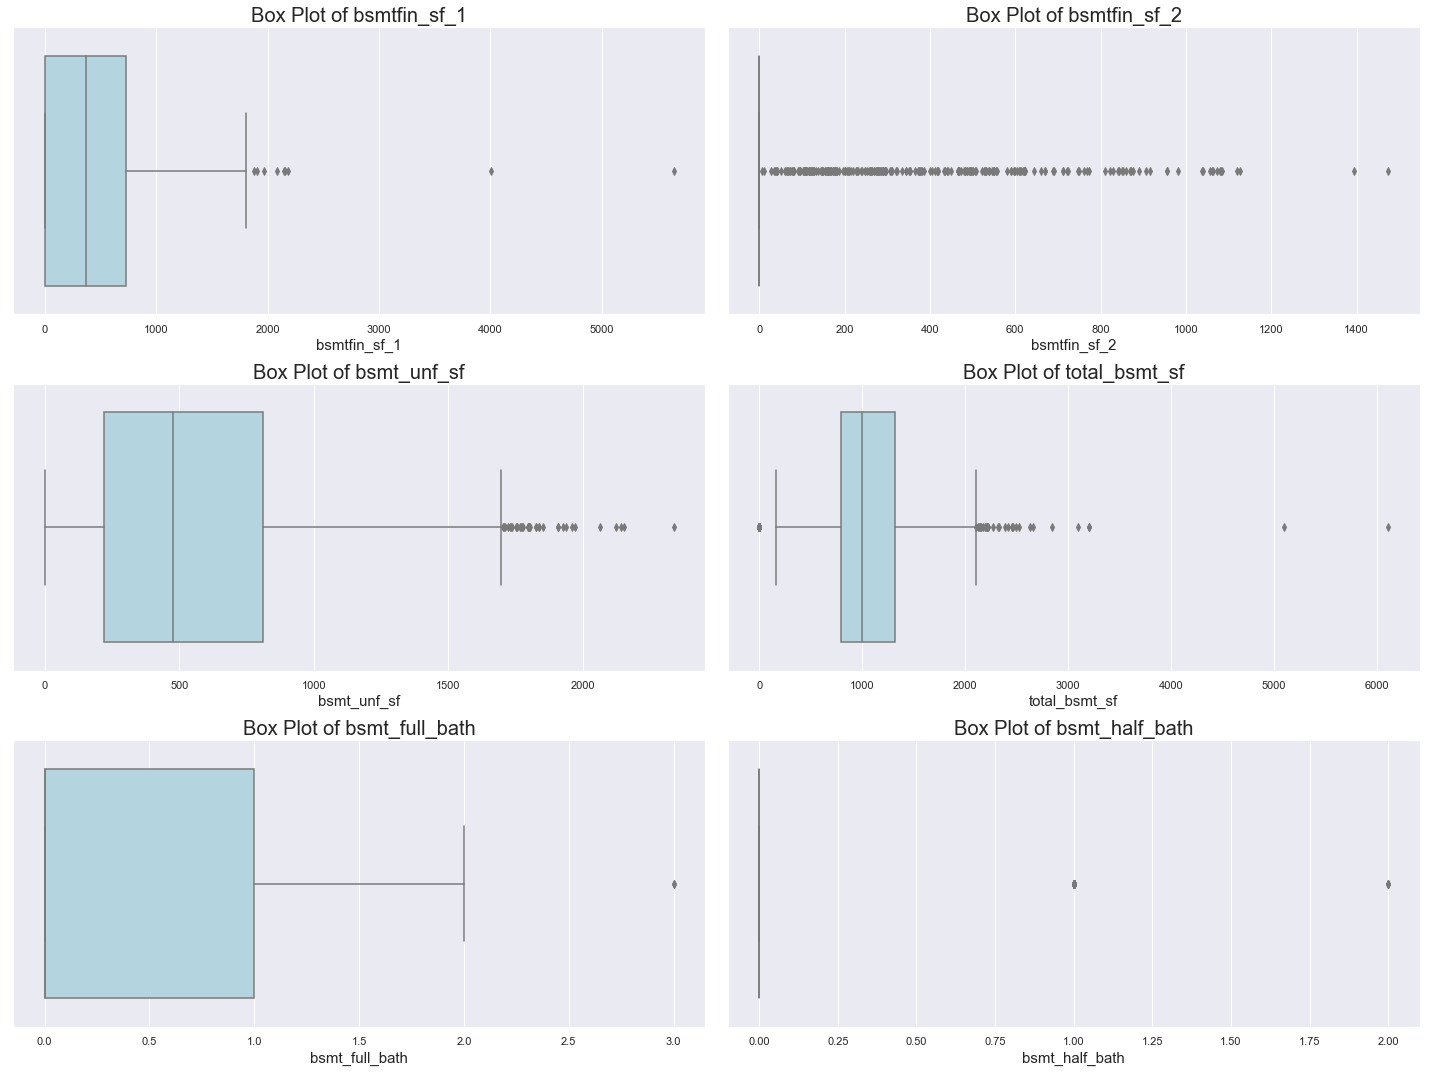

In [60]:
subplot_boxes(train, num_bsmt_cols)

The boxplot indicates that the individual columns are influenced by its respective high outliers. To minimize the impact of imputing data, I will use the median values of each column to impute missing/null values. Although imputing such data may introduce bias, since I am imputing 1 to 2 values, the impact is not signifcant.

In [61]:
def impute_bsmt_nulls(df, column_list):
    for col in column_list:
        df[col] = df[col].fillna(df[col].median())

In [62]:
impute_bsmt_nulls(train, num_bsmt_cols)

**Final check that all basement-related columns are not null**

In [63]:
train[bsmt_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 11 columns):
bsmt_qual         2050 non-null object
bsmt_cond         2050 non-null object
bsmt_exposure     2050 non-null object
bsmtfin_type_1    2050 non-null object
bsmtfin_sf_1      2050 non-null float64
bsmtfin_type_2    2050 non-null object
bsmtfin_sf_2      2050 non-null float64
bsmt_unf_sf       2050 non-null float64
total_bsmt_sf     2050 non-null float64
bsmt_full_bath    2050 non-null float64
bsmt_half_bath    2050 non-null float64
dtypes: float64(6), object(5)
memory usage: 192.2+ KB


In [64]:
train[['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf']].head() 
##don't be aggressive on feature engineering on bsmt b/c unf or fin may have big impact

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
Id,,,,
109,533.0,0.0,192.0,725.0
544,637.0,0.0,276.0,913.0
153,731.0,0.0,326.0,1057.0
318,0.0,0.0,384.0,384.0
255,0.0,0.0,676.0,676.0


In [65]:
train['bsmt_full_bath'].value_counts()

0.0    1201
1.0     824
2.0      23
3.0       2
Name: bsmt_full_bath, dtype: int64

In [66]:
train['bsmt_half_bath'].value_counts()

0.0    1924
1.0     122
2.0       4
Name: bsmt_half_bath, dtype: int64

In [67]:
# train['bsmt_total_bath'] = train['bsmt_half_bath'] + train['bsmt_full_bath']
# can't just add bsmt numbers...

In [68]:
train.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 80 columns):
pid                2050 non-null int64
ms_subclass        2050 non-null int64
ms_zoning          2050 non-null object
lot_frontage       1720 non-null float64
lot_area           2050 non-null int64
street             2050 non-null object
alley              2050 non-null object
lot_shape          2050 non-null object
land_contour       2050 non-null object
utilities          2050 non-null object
lot_config         2050 non-null object
land_slope         2050 non-null object
neighborhood       2050 non-null object
condition_1        2050 non-null object
condition_2        2050 non-null object
bldg_type          2050 non-null object
house_style        2050 non-null object
overall_qual       2050 non-null object
overall_cond       2050 non-null object
year_built         2050 non-null int64
year_remod/add     2050 non-null int64
roof_style         2050 non-null object
roof_matl        

Text(201.5, 0.5, 'bsmt_features')

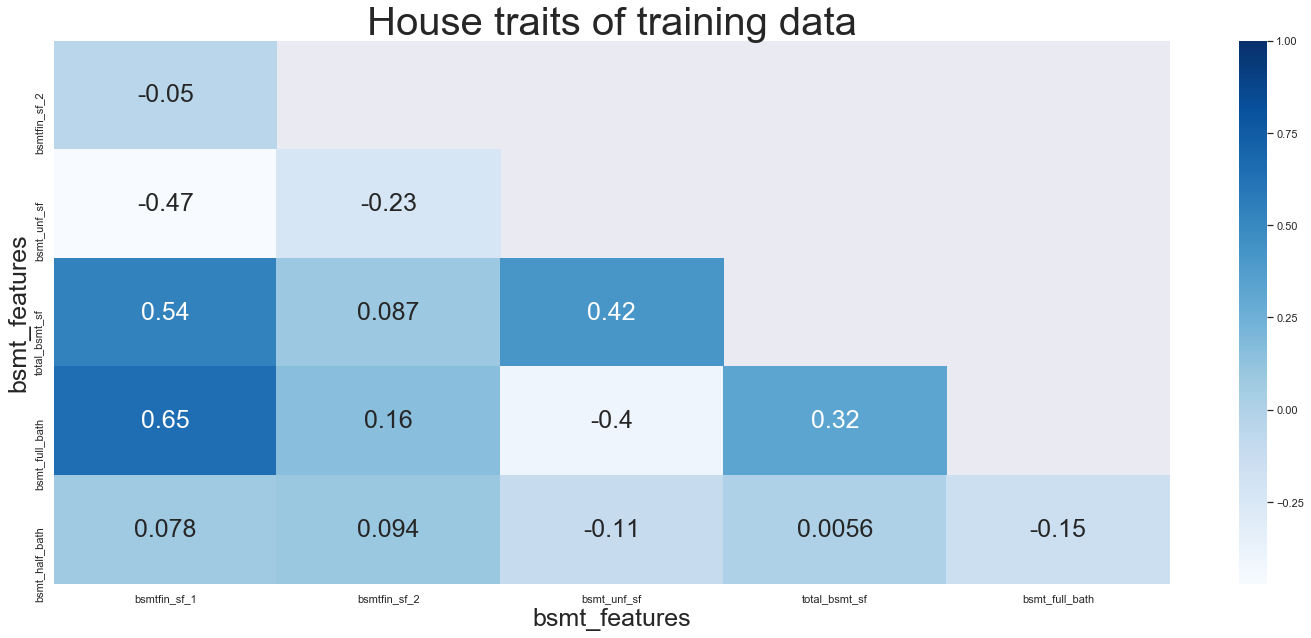

In [69]:
fig = plt.figure(figsize = (25,10))
mask = np.triu(np.ones_like(train[bsmt_columns].corr()))
ax = sns.heatmap(
    train[bsmt_columns].corr(), annot = True, annot_kws={"size":25},  
    mask = mask,
    cmap = 'Blues')
ax.set_title('House traits of training data', fontsize = 40)
y_min, y_max = ax.get_ylim() ##getting rid of the variable with corr 1
x_min, x_max = ax.get_xlim()
ax.set_ylim(top=y_max+1)
ax.set_xlim(right=x_max-1)
ax.set_xlabel('bsmt_features', fontsize = 25)
ax.set_ylabel('bsmt_features', fontsize = 25)

Due to multicollinearity, we should be careful if our features are highly correlated with each other in either direction. Correlatinship factor of 0.65 between bsmtfin_sf_1 and bsmt_full_bath does not alarm me at this point and hence will be left as is.

## Garage

In [70]:
##Define function to fill all NA data in basement columns with 'NB' (a.k.a 'No basement')
def replace_garage_na(df, garage_columns):
    for col in garage_columns:
        if df[col].dtype == 'object': 
            df[col].fillna('NG', inplace = True)

In [71]:
garage_columns = [col for col in train.columns if 'garage' in col]

In [72]:
garage_columns

['garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond']

In [73]:
garage_num_columns = [col for col in garage_columns if train[col].dtype != 'object']

In [74]:
train['garage_cars'].unique()

array([2., 1., 3., 0., 4., 5.])

In [75]:
train['garage_area'].value_counts();

In [76]:
replace_garage_na(train, garage_columns)

In [77]:
train[garage_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 7 columns):
garage_type      2050 non-null object
garage_yr_blt    1937 non-null float64
garage_finish    2050 non-null object
garage_cars      2050 non-null float64
garage_area      2050 non-null float64
garage_qual      2050 non-null object
garage_cond      2050 non-null object
dtypes: float64(3), object(4)
memory usage: 128.1+ KB


In [78]:
{col: train[col].isnull().sum() for col in garage_columns}

{'garage_type': 0,
 'garage_yr_blt': 113,
 'garage_finish': 0,
 'garage_cars': 0,
 'garage_area': 0,
 'garage_qual': 0,
 'garage_cond': 0}

What to do with garage_yr_blt???

### Exploring garage-related variables

In [79]:
##Final_plot
def subplot_boxes(df, x_list, ncols = 2, color='lightblue'):
    nrows = int(np.ceil(len(x_list)/ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize=(20,5*nrows))
    ax = ax.ravel()
    for i, x in enumerate(x_list):
        sns.boxplot(df[x], ax=ax[i], color=color)
        ax[i].set_title(f'Box Plot of {x}', fontsize=20)
        ax[i].set_xlabel(x, fontsize=15)

    plt.tight_layout()

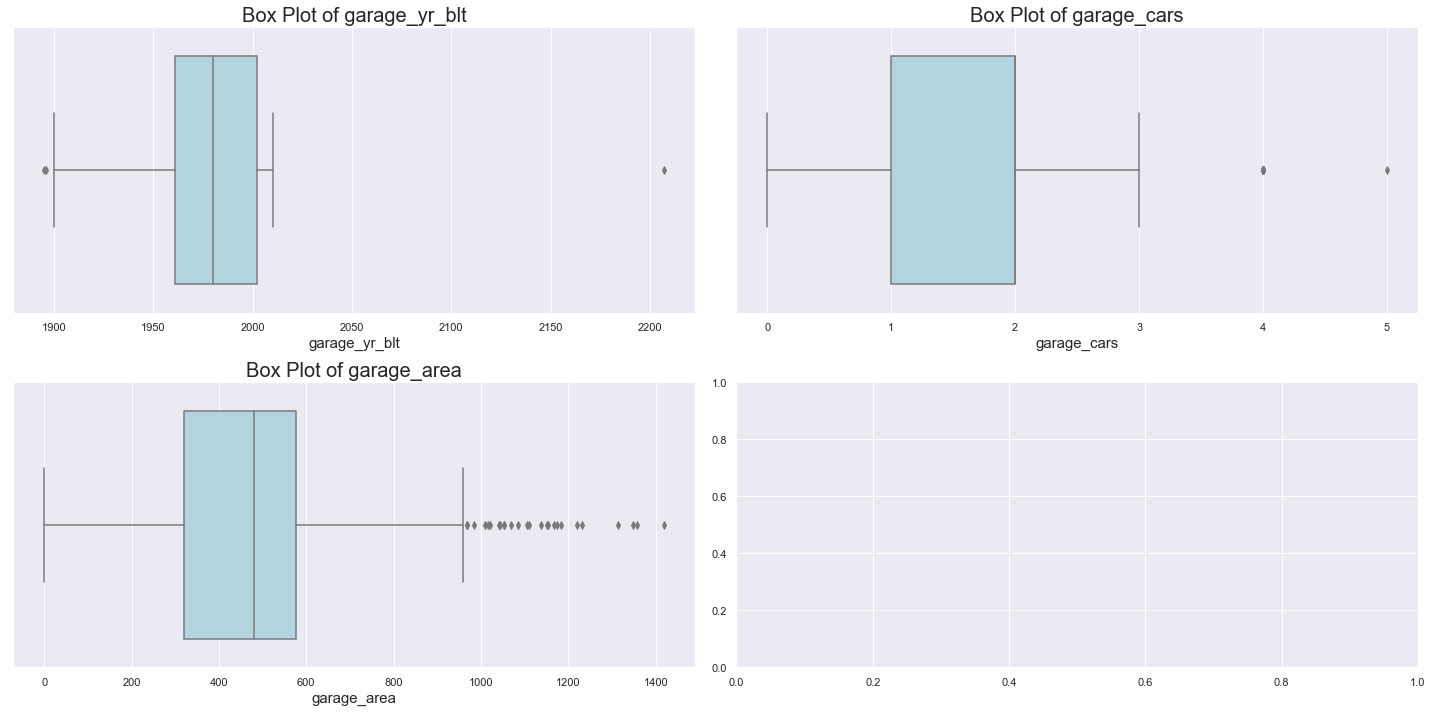

In [80]:
subplot_boxes(train, garage_num_columns)

Per sub_boxplots, there is an outlier in the garage_yr_blt of ~2200 which is nonsensical which we will convert to 2007.

In [81]:
train.loc[2261];

In [82]:
train.loc[2261,'garage_yr_blt'] = 2007

Because the year_sold is 2007, I imputed the observation as 2007; the impact will be minimal.

In [83]:
train[garage_columns].isnull().sum()

garage_type        0
garage_yr_blt    113
garage_finish      0
garage_cars        0
garage_area        0
garage_qual        0
garage_cond        0
dtype: int64

Text(201.453125, 0.5, 'garage_features')

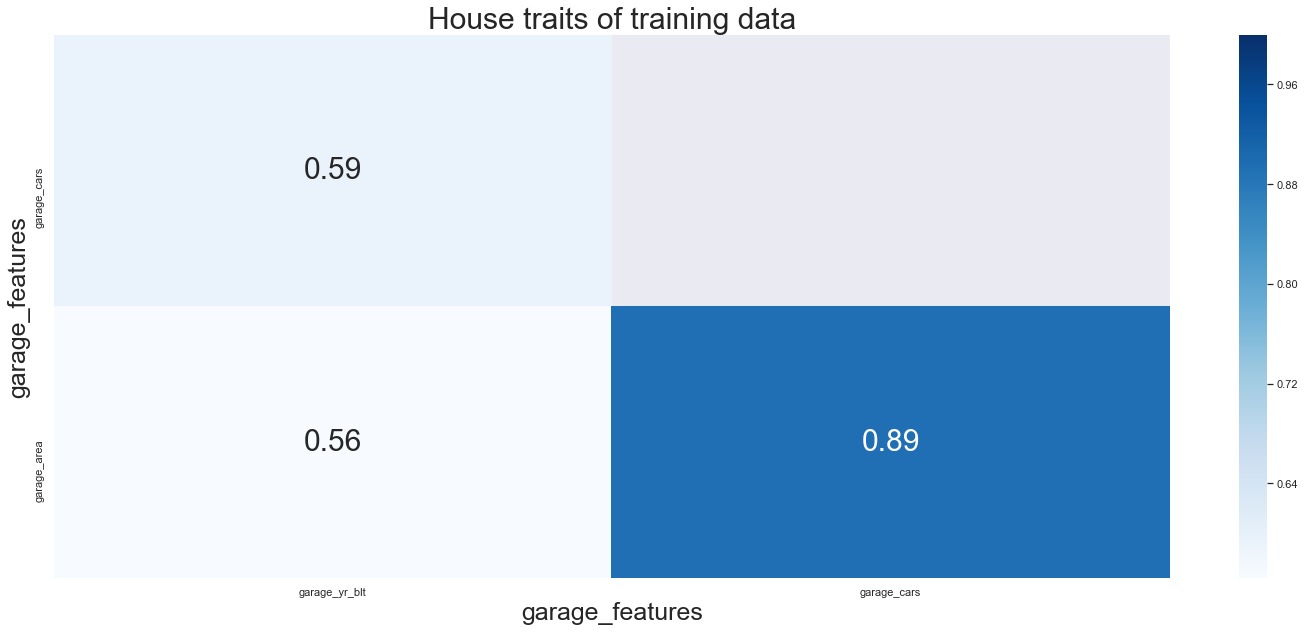

In [84]:
fig = plt.figure(figsize = (25,10))
mask = np.triu(np.ones_like(train[garage_columns].corr()))
ax = sns.heatmap(
    train[garage_columns].corr(), annot = True, annot_kws={"size":30}, 
    mask = mask,
    cmap = 'Blues')
ax.set_title('House traits of training data', fontsize = 30)
y_min, y_max = ax.get_ylim() ##getting rid of the variable with corr 1
x_min, x_max = ax.get_xlim()
ax.set_ylim(top=y_max+1)
ax.set_xlim(right=x_max-1)
ax.set_xlabel('garage_features', fontsize = 25)
ax.set_ylabel('garage_features', fontsize = 25)

Unlike basement related features, the correlation factor between garage_cars and garage_area is almost 0.9. To address multicollinearity , I will drop garage_cars column. The addition of interaction term does not make logical sense as the combination of the two (garage_area and garage_cars) does not lead me to believe would conclude a stronger relationship than the two separate.

In [85]:
train.drop('garage_cars', axis = 1, inplace = True)

In [86]:
train.shape

(2050, 79)

### Drop columns

In [87]:
train.drop(['pid','lot_frontage', 'mas_vnr_type', 'mas_vnr_area', 'garage_yr_blt'], axis = 1, inplace = True)

Manual feature selection: pid has no discernible relationship with target variable of SalePrice. Features such as lot_frontage, mas_vnr_type, mas_vnr_area, garage_yr_blt as it had relatively too many null values and no logical process to impute variables.

In [88]:
train.shape

(2050, 74)

In [89]:
train['overall_qual'] = train['overall_qual'].astype(int)

In [90]:
train.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 74 columns):
ms_subclass        2050 non-null int64
ms_zoning          2050 non-null object
lot_area           2050 non-null int64
street             2050 non-null object
alley              2050 non-null object
lot_shape          2050 non-null object
land_contour       2050 non-null object
utilities          2050 non-null object
lot_config         2050 non-null object
land_slope         2050 non-null object
neighborhood       2050 non-null object
condition_1        2050 non-null object
condition_2        2050 non-null object
bldg_type          2050 non-null object
house_style        2050 non-null object
overall_qual       2050 non-null int64
overall_cond       2050 non-null object
year_built         2050 non-null int64
year_remod/add     2050 non-null int64
roof_style         2050 non-null object
roof_matl          2050 non-null object
exterior_1st       2050 non-null object
exterior_2nd      

**The below boxplots comparing sale price to various categorical variables are plotted in this EDA notebook, but graphs are interpreted in the Modeling notebook to tie in the narrative more cohesively with calculated beta coefficients/weights.**

Text(0, 0.5, 'saleprice')

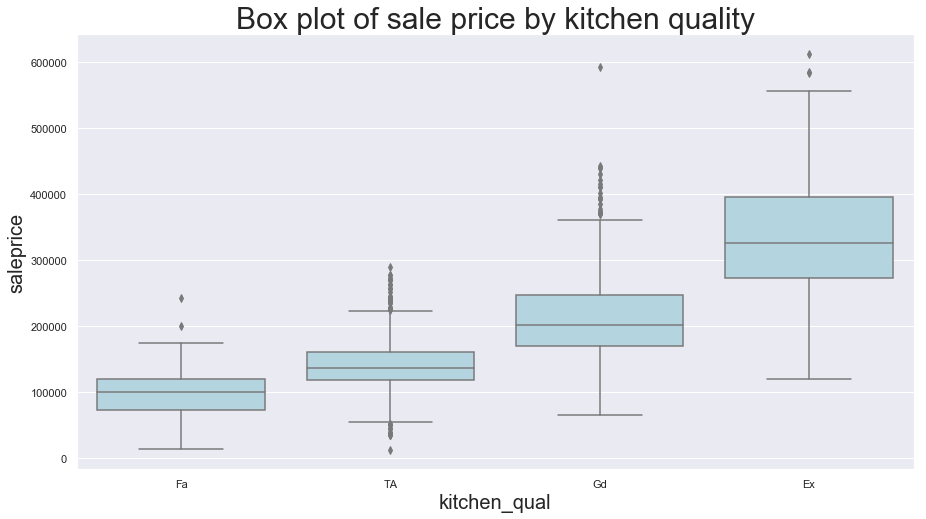

In [91]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='kitchen_qual', y='saleprice', data = train, order=['Fa', 'TA', 'Gd', 'Ex'], color = 'lightblue')
ax.set_title(f'Box plot of sale price by kitchen quality', fontsize=30)
ax.set_xlabel('kitchen_qual', fontsize = 20)
ax.set_ylabel('saleprice', fontsize = 20)
# ax.set_xticks(ticksize = 20)

Text(0, 0.5, 'saleprice')

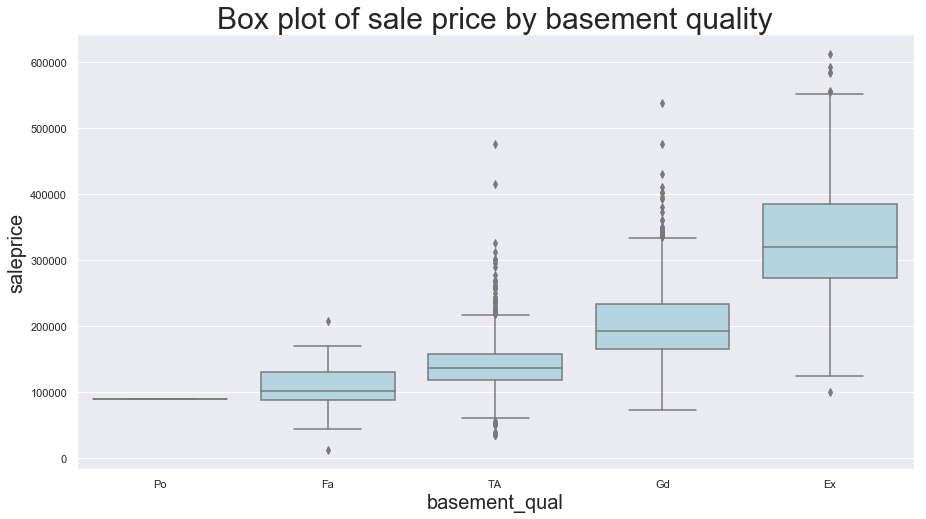

In [92]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='bsmt_qual', y='saleprice', data = train, order=['Po', 'Fa', 'TA' ,'Gd', 'Ex'], color = 'lightblue')
ax. set_title(f'Box plot of sale price by basement quality', fontsize = 30 )
ax.set_xlabel('basement_qual', fontsize = 20)
ax.set_ylabel('saleprice', fontsize = 20)

Text(0, 0.5, 'saleprice')

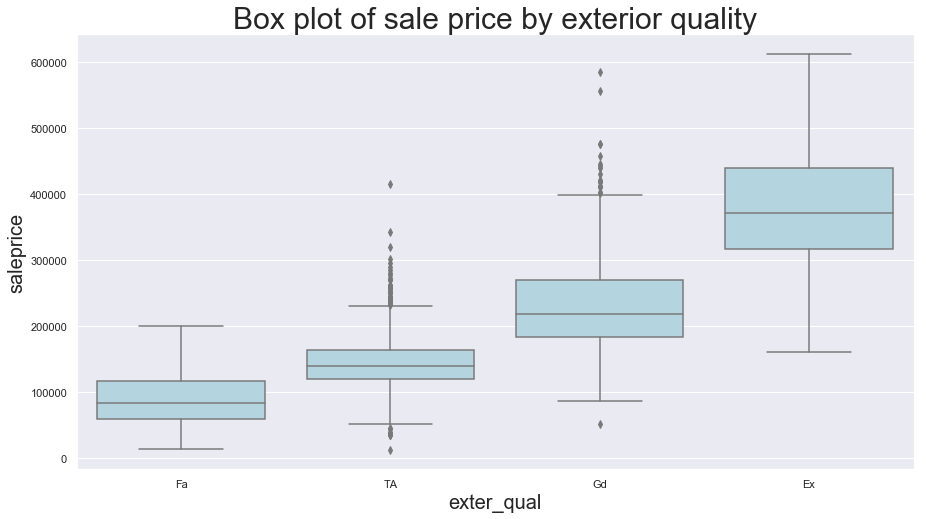

In [93]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='exter_qual', y='saleprice', data = train, order=['Fa', 'TA' ,'Gd', 'Ex'], color= 'lightblue')
ax. set_title(f'Box plot of sale price by exterior quality', fontsize = 30 )
ax.set_xlabel('exter_qual', fontsize = 20)
ax.set_ylabel('saleprice', fontsize = 20)

## Feature Engineering

In [94]:
train_overall_qual = train[['overall_qual']]

In [95]:
train_overall_cond = train[['overall_cond']]

In [96]:
train.drop(['overall_qual', 'overall_cond'], axis = 1, inplace = True)

In [97]:
train.shape

(2050, 72)

### Dummy variable (entire dataset)

In [98]:
train = pd.get_dummies(data = train)

In [99]:
train.shape

(2050, 294)

In [100]:
train['overall_qual'] = train_overall_qual

In [101]:
train['overall_cond'] = train_overall_cond

In [102]:
train.shape

(2050, 296)

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Columns: 296 entries, ms_subclass to overall_cond
dtypes: float64(7), int64(25), object(1), uint8(263)
memory usage: 1.1+ MB


In [104]:
train.head()

,ms_subclass,lot_area,year_built,year_remod/add,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,...,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,overall_qual,overall_cond
Id,,,,,,,,,,,,,,,,,,,,,
109,60,13517,1976,2005,533.0,0.0,192.0,725.0,725,754,...,0,0,0,0,0,0,0,1,6,8
544,60,11492,1996,1997,637.0,0.0,276.0,913.0,913,1209,...,0,0,0,0,0,0,0,1,7,5
153,20,7922,1953,2007,731.0,0.0,326.0,1057.0,1057,0,...,0,0,0,0,0,0,0,1,5,7
318,60,9802,2006,2007,0.0,0.0,384.0,384.0,744,700,...,0,0,0,0,0,0,0,1,5,5
255,50,14235,1900,1993,0.0,0.0,676.0,676.0,831,614,...,0,0,0,0,0,0,0,1,6,8


With my dataset now imputed and cleaned to have no null values, preprocessing and modeling techniques can now be explored in order to answer individuals looking to flip houses where they should focus their time and investments on.

# Exporting

In [105]:
np.asarray(train)

array([[60, 13517, 1976, ..., 1, 6, 8],
       [60, 11492, 1996, ..., 1, 7, 5],
       [20, 7922, 1953, ..., 1, 5, 7],
       ...,
       [50, 7558, 1928, ..., 1, 6, 6],
       [20, 10400, 1956, ..., 1, 4, 5],
       [60, 7500, 1999, ..., 1, 7, 5]], dtype=object)

In [106]:
train.to_csv('../datasets/final_train_2.csv')

In [107]:
# with open('./datasets/final_train_2.csv', 'w+') as f:
#     csv_writer = csv.writer(f)
#     csv_writer.writerows(train)

**On to preprocessing!**